In [1]:
import pandas as pd
import ast
from datetime import datetime
from collections import namedtuple
import os

In [2]:
df_list = []
root = 'Data'
file_list = os.listdir(root)
(file_list[1])

'1.txt'

In [3]:
df_list = []

for f in file_list:
    df_list.append(pd.read_csv("Data/"+f,encoding='ISO-8859-1',sep='|',names=['advisor','current_company','disclosures','company_history','start','end','company_location']))


In [4]:
#pd.read_csv("Data/"+"0.txt",encoding='ISO-8859-1',sep='|',names=['advisor','current_company','disclosures','company_history','start','end','company_location'])

In [5]:
#import pickle
import numpy as np
col_names=['advisor','current_company','disclosures','company_history','start','end','company_location']

#np.array(my_list).reshape(3,3), columns = col_names
#df = pd.DataFrame(np.array(df_list).reshape(len(df_list),7), columns = col_names )

In [21]:
(df_list[0])

,advisor,current_company,disclosures,company_history,start,end,company_location
0,MATTHEW J BROZOVIC,149777.0,0,"['CITIGROUP GLOBAL MARKETS INC.', 'MORGAN STAN...","['07/1993', '06/2009', '01/2015']","['06/2009', '01/2015', '04/2017']","['CHICAGO IL', 'CHICAGO IL', 'NEW YORK NY']"
1,MARK ROBERT HANSON,1137.0,0,"['PRINCIPAL LIFE INSURANCE COMPANY', 'PRINCOR ...","['07/1998', '10/1990', '04/2000']","['10/1990', '04/2000', '04/2017']","['DES MOINES IA', 'DES MOINES IA', 'NAPERVILLE..."
2,Steven H. Tolley,250.0,0,"['EDWARD D. JONES & CO., L.P.']",['03/1992'],['04/2017'],['OREM UT']
3,STEVEN ROY WILLIAMSON,6363.0,0,"['Ameriprise Financial Services, Inc.']",['02/1992'],['04/2017'],['Midlothian VA']
4,CAROL FRANCES HENRICK,14869.0,0,"['METROPOLITAN LIFE INSURANCE COMPANY', 'METLI...","['10/1989', '10/1989', '01/2011', '01/2011', '...","['09/2010', '09/2010', '01/2011', '12/2011', '...","['LAKE ST LOUIS MO', 'LAKE ST LOUIS MO', 'LINC..."
5,JOSEPH MICHAEL MUZIANI,149777.0,0,"['MORGAN STANLEY SMITH BARNEY', 'MERRILL LYNCH...","['09/2014', '12/1980']","['12/1980', '09/2014']","['MT. LAUREL NJ', 'PRINCETON NJ']"
6,JOHN THOMAS BUCKLEY,46727.0,0,"['THE BANK OF NEW YORK', 'BNY BROKERAGE INC.',...","['06/1998', '06/2000', '08/2007', '12/2009', '...","['08/2007', '08/2007', '10/2009', '08/2010', '...","['NEW YORK NY', 'NEW YORK NY', 'LISLE IL', 'MA..."
7,ERIC THOMAS SCOGGINS,156549.0,1,"['ETS FINANCIAL SERVICES', 'WALNUT STREET', 'C...","['06/1997', '10/2004', '10/2013']","['10/2004', '06/2008', '04/2017']","['SUWANEE GA', 'SUWANEE GA', 'COPPELL TX']"
8,BRENT CHARLES ION,149777.0,0,"['MORGAN STANLEY SMITH BARNEY', 'CITIGROUP GLO...","['06/2009', '01/1995', '01/2015']","['01/1995', '01/2015', '04/2017']","['WEST PALM BEACH FL', 'WEST PALM BEACH FL', '..."
9,DANIEL J HOLZRICHTER,8158.0,0,"['MORGAN STANLEY SMITH BARNEY', 'CITIGROUP GLO...","['06/2009', '03/2001', '02/2011']","['02/2011', '06/2009', '04/2017']","['SIOUX CITY IA', 'SIOUX CITY IA', 'SIOUX CITY..."


In [34]:
#for c in range (20):
#    nbg_in_each=[]  #number of bad guys
#    df_list[c]['company_history'][df_list[c]['disclosures']>0]
#    nbg_in_each.extend( len(str(df_list[c]['advisor'])) )
#    print nbg_in_each

In [6]:
def users_in_common(dataf,name,current_file):
    
    def col2list(df,col):
        #print(df['advisor'][0])
        new_col = []
        count = 0
        #print(col)
        for i in df[col]:
            try:
                new_col.append(ast.literal_eval(i))
                count += 1
            except:
                new_col.append([])
        ser = pd.Series(new_col)
        df[col] = ser   

    def date_diff(date1,date2,date11,date22):
        Range = namedtuple('Range', ['start','end'])
        #date1 = '07/1993'.split('/')
        date1 = date1.split('/')
        date2 = date2.split('/')
        if int(date1[0]) > int(date2[0]) and int(date1[1]) > int(date2[1]):
            f = date1
            date1 = date2
            date2 = f
        date11 = date11.split('/')
        date22 = date22.split('/')
        r1 = Range(start=datetime(int(date1[1]), int(date1[0]), 14), end=datetime(int(date2[1]), int(date2[0]), 14))
        r2 = Range(start=datetime(int(date11[1]), int(date11[0]), 14), end=datetime(int(date22[1]), int(date22[0]), 14))
        latest_start = max(r1.start, r2.start)
        earliest_end = min(r1.end, r2.end)
        overlap = (earliest_end - latest_start).days + 1
        return overlap

    def name_index(name):
        global df
        for index in range(0,len(list(df['advisor']))):
            i = list(df['advisor'])[index]
            if name.lower() == str(i).lower():
                return list(df['advisor']).index(name)

    def how_long(name): # is this function supposed to take another name
        global df
        """Checks how long a certain has worked with who?"""
        in_common = []
        #input_name_index = name_index(name)
        #input_name_index = list(df['advisor']).index(name)
        #print(len(company_history))
        for company_input_index in range(0,len(company_history)):
            company_input = company_history[company_input_index]
            #print('hey')
            for advisor_index in range(0,len(df['advisor'])):
                #print('hey')
                if company_input in df['company_history'][advisor_index]:
                   
                    if company_locations[company_input_index] in df['company_location'][advisor_index]:
                        
                        advisor_matching_index = df['company_location'][advisor_index].index(company_locations[company_input_index])
                        date1 = date1_list[company_input_index]
                        date2 = date2_list[company_input_index]
                        date11 = df['start'][advisor_index][advisor_matching_index]
                        date22 = df['end'][advisor_index][advisor_matching_index]
                        dd = date_diff(date1, date2, date11, date22)
                        if dd >= 1:
                            in_common.append(str(df['advisor'][advisor_index]) + ':' + str(dd))
        return in_common
    df = dataf
    
    
    global desired_user
    if (name in list(df['advisor'])) and (desired_user is None):
        print('Yahoooo!!')
        name_index = list(df['advisor']).index(name)
        #print(name_index)
        desired_user = df[name_index:name_index+1]
        #print(desired_user)
        return ['found it']
    elif desired_user is None:
        return ['not it']
    #print(desired_user)
    company_history = list(desired_user['company_history'])[0]
    company_locations = list(desired_user['company_location'])[0] 
    date1_list = list(desired_user['start'])[0]
    date2_list = list(desired_user['end'])[0]
    
    change_list = ['company_history','start','end','company_location']
    for i in change_list:
        col2list(df,i)
    
    #print(company_history)
        
    return how_long(name)

In [11]:
#def find_connections (input_name):

input_name = 'STEVEN ROY WILLIAMSON'
total_in_common = []
current_file = 0
    #global desired_user
desired_user = None
while current_file <= len(df_list) - 1:
    #print('Df Count:' + str(current_file))
    df = df_list[current_file]
    total = users_in_common(df, input_name, current_file)
    #print(total)
    if total == ['not it']:
        current_file += 1
    elif total == ['found it']:
        current_file = 0
    else:
        for i in total:
            total_in_common.append(i)
        current_file += 1
        print(current_file)

#return total_in_common   
print("Total in common: ", total_in_common)

#return total_in_common

Yahoooo!!


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
('Total in common: ', ['JOSEPH RYAN STEMMLE:701', 'WILLIAM H SHIREY:4231', 'KEVIN D WILLIAMSON:7245', 'JOANN M STITH-MALONEY:1674', 'REBECCA E SHRINER:4231', 'BRAD AARON SWARTZWELDER:4231', 'BIVAS KANTI GHOSH:5327', 'KEVIN ALEXANDER MAUTTE:1006', 'JEFFREY NORMAN JONES:4231', 'ROBERT EUGENE SCHINSKY:4415', 'JONATHAN CHRISTOPHER WOOD:4109', 'SAMANTHA COLLIER WOOTON:4019', 'VICTOR MICHAEL DI VITTORIO:4231', 'JOHN BRADFORD SCOTT:4231', 'JEFF WAYNE ROHR:4231', 'CESAR R E MOREL:4231', 'PETER ANTONY MAROTTA:4231'])


In [12]:
import networkx as nx
from nxpd import draw
import matplotlib.pyplot as plt
%matplotlib inline

indiv = 'STEVEN ROY WILLIAMSON'
#l = ['JOSEPH RYAN STEMMLE:701', 'WILLIAM H SHIREY:4231', 'KEVIN D WILLIAMSON:7245', 'JOANN M STITH-MALONEY:1674', 'REBECCA E SHRINER:4231', 'BRAD AARON SWARTZWELDER:4231', 'BIVAS KANTI GHOSH:5327', 'KEVIN ALEXANDER MAUTTE:1006', 'JEFFREY NORMAN JONES:4231', 'ROBERT EUGENE SCHINSKY:4415', 'JONATHAN CHRISTOPHER WOOD:4109', 'SAMANTHA COLLIER WOOTON:4019', 'VICTOR MICHAEL DI VITTORIO:4231', 'JOHN BRADFORD SCOTT:4231', 'JEFF WAYNE ROHR:4231', 'CESAR R E MOREL:4231', 'PETER ANTONY MAROTTA:4231']
b = total_in_common[0:10]
#print(a)

In [13]:
'''def column2list(dataframe,column):
    new_column = []
    count = 0
    for i in dataframe[column]:
        try:
            new_column.append(ast.literal_eval(i))
            count = count + 1
        except:
            new_column.append([])
        series = pd.Series(new_column)
        dataframe[column] = series
'''

'def column2list(dataframe,column):\n    new_column = []\n    count = 0\n    for i in dataframe[column]:\n        try:\n            new_column.append(ast.literal_eval(i))\n            count = count + 1\n        except:\n            new_column.append([])\n        series = pd.Series(new_column)\n        dataframe[column] = series\n'

In [14]:
'''
def name_index(name):
    global df
    for index in range(0,len(list(df['advisor']))):
        i = list(df['advisor'])[index]
        if name.lower() == str(i).lower():
            return list(df['advisor']).index(name)
'''

"\ndef name_index(name):\n    global df\n    for index in range(0,len(list(df['advisor']))):\n        i = list(df['advisor'])[index]\n        if name.lower() == str(i).lower():\n            return list(df['advisor']).index(name)\n"

In [15]:
#convert col to list.
#column2list(df_list,1)

In [16]:
#(df_list[19]['advisor'])

In [17]:
G = nx.Graph()
G.add_node(indiv)
for i in b:
    print(i.split(':'))
    a = i.split(':')
    G.add_node(a[0])
    #G.add_edge(indiv,a[0])
    print(int(a[1]))
    G.add_weighted_edges_from([(indiv,a[0],int(a[1]))])
#G.add_weighted_edges_from()
G.nodes()

['JOSEPH RYAN STEMMLE', '701']
701
['WILLIAM H SHIREY', '4231']
4231
['KEVIN D WILLIAMSON', '7245']
7245
['JOANN M STITH-MALONEY', '1674']
1674
['REBECCA E SHRINER', '4231']
4231
['BRAD AARON SWARTZWELDER', '4231']
4231
['BIVAS KANTI GHOSH', '5327']
5327
['KEVIN ALEXANDER MAUTTE', '1006']
1006
['JEFFREY NORMAN JONES', '4231']
4231
['ROBERT EUGENE SCHINSKY', '4415']
4415


['JOANN M STITH-MALONEY',
 'BRAD AARON SWARTZWELDER',
 'WILLIAM H SHIREY',
 'BIVAS KANTI GHOSH',
 'ROBERT EUGENE SCHINSKY',
 'KEVIN D WILLIAMSON',
 'JEFFREY NORMAN JONES',
 'REBECCA E SHRINER',
 'STEVEN ROY WILLIAMSON',
 'JOSEPH RYAN STEMMLE',
 'KEVIN ALEXANDER MAUTTE']

In [18]:
G.nodes()

['JOANN M STITH-MALONEY',
 'BRAD AARON SWARTZWELDER',
 'WILLIAM H SHIREY',
 'BIVAS KANTI GHOSH',
 'ROBERT EUGENE SCHINSKY',
 'KEVIN D WILLIAMSON',
 'JEFFREY NORMAN JONES',
 'REBECCA E SHRINER',
 'STEVEN ROY WILLIAMSON',
 'JOSEPH RYAN STEMMLE',
 'KEVIN ALEXANDER MAUTTE']

C:\ProgramData\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\ProgramData\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

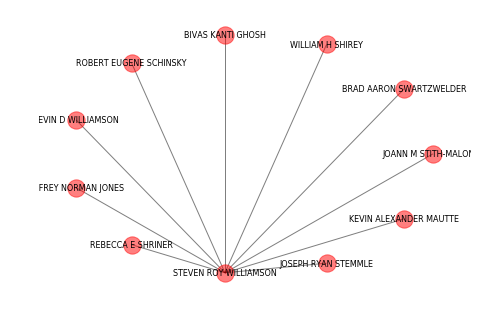

In [19]:
#pos=nx.graphviz_layout(G)


pos = nx.spring_layout(G,k=5)
nx.draw_circular(G,with_labels=1,font_size=8, alpha=0.5)

#nx.draw(G, pos=graphviz_layout(G))
plt.show()
#plt.savefig('test.png')

In [20]:
#import sys
#sys.executable

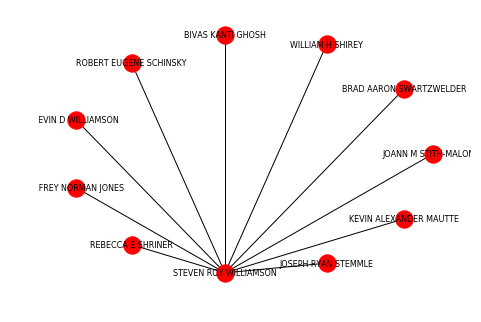

In [21]:
#pos=nx.graphviz_layout(G)

pos = nx.spring_layout(G,k=2)
nx.draw_circular(G,with_labels=2,font_size=8, alpha=1)

#nx.draw(G, pos=graphviz_layout(G))
plt.show()
#plt.savefig('test.png')

In [111]:
#from graph_tool.all import *

In [17]:
#df_json = pd.read_json('IA_Indvl_Feeds1.json')


In [156]:
#df_json

In [155]:
#df_json.index

In [154]:
#df_json['Indvls']

In [153]:
#import igraph as ig